In [227]:
import sklearn as sk
from sklearn import linear_model
import pandas as pd
import numpy as np

In [228]:
X = pd.read_csv('data/preprocessing/X_fill.csv')
y = pd.read_csv('data/preprocessing/y.csv')

In [229]:
X.columns

Index(['educ_center',
       'harass5_Does not apply (i do not have a job/superior/co-worker)',
       'harass5_No', 'harass5_Yes', 'harass5_unknown', 'polviews_Conservative',
       'polviews_Extremely liberal', 'polviews_Extrmly conservative',
       'polviews_Liberal', 'polviews_Moderate',
       'polviews_Slghtly conservative', 'polviews_Slightly liberal',
       'polviews_unknown', 'advfront_Agree', 'advfront_Disagree',
       'advfront_Dont know', 'advfront_Strongly agree',
       'advfront_Strongly disagree', 'advfront_unknown', 'snapchat_No',
       'snapchat_Yes', 'snapchat_unknown', 'instagrm_No', 'instagrm_Yes',
       'instagrm_unknown', 'wrkstat_Keeping house', 'wrkstat_Other',
       'wrkstat_Retired', 'wrkstat_School', 'wrkstat_Temp not working',
       'wrkstat_Unempl, laid off', 'wrkstat_Working fulltime',
       'wrkstat_Working parttime', 'wrkstat_unknown'],
      dtype='object')

In [230]:
size = y.shape[0]
mu = 0
sigma = 1e-6
noise = np.random.normal(mu,sigma,size)

In [231]:
y['noise'] = y['email_time_center'] + sigma

In [232]:
y[y['noise'] == 0]

,email_time_center,noise


array([[<Axes: title={'center': 'email_time_center'}>,
        <Axes: title={'center': 'noise'}>]], dtype=object)

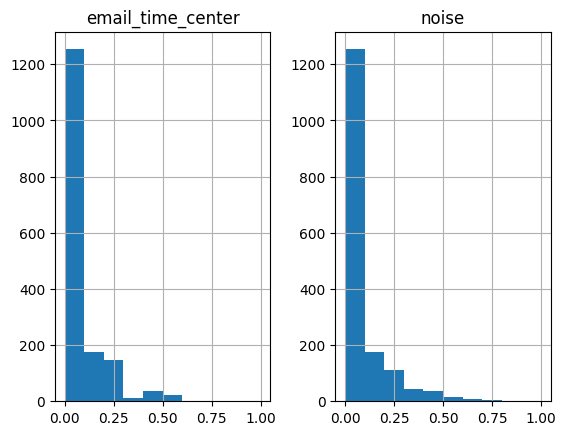

In [233]:
y.hist()

In [234]:
from sklearn.model_selection import train_test_split

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y['noise'], test_size=0.2, random_state=42)

In [236]:
print(X_train.shape)
print(y_train.shape)

(1319, 34)
(1319,)


In [237]:
# y_train.hist()

In [238]:
# y_train_log = np.log(y_train)
# y_train_log.hist()

In [239]:
# clf = linear_model.GammaRegressor()
# clf.fit(X_train, y_train)

In [240]:
# clf.coef_

In [241]:
# y_pred = clf.predict(X_test)

In [242]:
# from sklearn.metrics import mean_squared_error

# mean_squared_error(y_test, y_pred)

In [243]:
# y_train_log = np.log(y_train)
# y_test_log = np.log(y_test)

In [244]:
# y_test_log.shape

In [245]:
# from sklearn.linear_model import ElasticNet

# regr = ElasticNet(random_state=0)
# regr.fit(X_train, y_train_log)

In [246]:
# y_pred = np.exp(regr.predict(X_test))

# mean_squared_error(y_test, y_pred)

In [247]:
import statsmodels.api as sm

link_function = sm.genmod.families.links.Log()
gamma_model = sm.GLM(y_train, X_train, family=sm.families.Gamma(link=link_function))
gamma_results = gamma_model.fit(method='lbfgs')
gamma_results.summary()

/Users/linhnm/msc_source/social-stat-final-term/venv/lib/python3.10/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/linhnm/msc_source/social-stat-final-term/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  noise   No. Observations:                 1319
Model:                            GLM   Df Residuals:                     1291
Model Family:                   Gamma   Df Model:                           27
Link Function:                    Log   Scale:                          3.1800
Method:                         lbfgs   Log-Likelihood:                 3317.8
Date:                Mon, 14 Aug 2023   Deviance:                       5260.4
Time:                        00:50:49   Pearson chi2:                 4.11e+03
No. Iterations:                   100   Pseudo R-squ. (CS):            0.09962
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
educ_center                                                         2.0675      0.374      5.529      0.000       1.335       2.800
harass5_Does not apply (i do not have a job/superior/co-worker)    -1.2288   3.23e+06   -3.8e-07      1.000   -6.33e+06    6.33e+06
harass5_No                                                         -0.3848   3.26e+06  -1.18e-07      1.000   -6.39e+06    6.39e+06
harass5_Yes                                                        -0.1423   3.27e+06  -4.35e-08      1.000   -6.41e+06    6.41e+06
harass5_unknown                                                    -1.2461   3.18e+06  -3.92e-07      1.000   -6.22e+06    6.22e+06
polviews_Conservative                                              -0.3887   1.62e+06  -2.39e-07      1.000   -3.18e+06    3.18e+06
polviews_Extremely liberal                                         -0.4361    1.8e+06  -2.43e-07      1.000   -3.52e+06    3.52e+06
polviews_Extrmly conservative                                      -0.9037   8.36e+05  -1.08e-06      1.000   -1.64e+06    1.64e+06
polviews_Liberal                                                   -0.4826        nan        nan        nan         nan         nan
polviews_Moderate                                                  -0.2764   9.35e+05  -2.96e-07      1.000   -1.83e+06    1.83e+06
polviews_Slghtly conservative                                      -0.4119   1.11e+06   -3.7e-07      1.000   -2.18e+06    2.18e+06
polviews_Slightly liberal                                          -0.2431   1.97e+06  -1.23e-07      1.000   -3.87e+06    3.87e+06
polviews_unknown                                                    0.1406   1.58e+06   8.87e-08      1.000   -3.11e+06    3.11e+06
advfront_Agree                                                     -0.5061   4.06e+06  -1.25e-07      1.000   -7.96e+06    7.96e+06
advfront_Disagree                                                  -0.2314   4.23e+06  -5.47e-08      1.000   -8.29e+06    8.29e+06
advfront_Dont know                                                 -0.1165   4.29e+06  -2.72e-08      1.000    -8.4e+06     8.4e+06
advfront_Strongly agree                                            -0.4819   4.12e+06  -1.17e-07      1.000   -8.07e+06    8.07e+06
advfront_Strongly disagree                                         -0.1160    4.2e+06  -2.76e-08      1.000   -8.24e+06    8.24e+06
advfront_unknown                                                   -1.5501   4.26e+06  -3.64e-07      1.000   -8.35e+06    8.35e+06
snapchat_No                                                        -1.1149        nan        nan        nan         nan         nan
snapchat_Yes                                   

In [248]:
def print_metrics(y_test, y_pred):
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)

  print(f'mse: {mse}, rmse: {rmse}, r2: {r2}')

In [249]:
y_pred = gamma_results.predict(X_test)
print_metrics(y_test, y_pred)

mse: 0.013052171547963336, rmse: 0.11424610079982309, r2: 0.0921670859660525


In [254]:
gamma_reg = sm.GLM(y_train, X_train, family=sm.families.Gamma(link=link_function))
gm_res = gamma_reg.fit_regularized(method='elastic_net', alpha=0.06, start_params=None, refit=False, opt_method='bfgs')

In [255]:
y_pred = gm_res.predict(X_test)
print_metrics(y_test, y_pred)

mse: 0.013768568223610474, rmse: 0.11733954245526303, r2: 0.04233871225313901


In [256]:
# link_function = sm.genmod.families.links.Log()
gm_id = sm.GLM(y_train, X_train, family=sm.families.Gamma())
gm_id_res = gm_id.fit(method='lbfgs')
gm_id_res.summary()

/Users/linhnm/msc_source/social-stat-final-term/venv/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/linhnm/msc_source/social-stat-final-term/venv/lib/python3.10/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/linhnm/msc_source/social-stat-final-term/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  noise   No. Observations:                 1319
Model:                            GLM   Df Residuals:                     1291
Model Family:                   Gamma   Df Model:                           27
Link Function:           InversePower   Scale:                          2.8566
Method:                         lbfgs   Log-Likelihood:                 3214.7
Date:                Mon, 14 Aug 2023   Deviance:                       5859.8
Time:                        00:51:45   Pearson chi2:                 3.69e+03
No. Iterations:                     2   Pseudo R-squ. (CS):           -0.04406
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
educ_center                                                       -22.2009      3.158     -7.031      0.000     -28.390     -16.012
harass5_Does not apply (i do not have a job/superior/co-worker)    -0.1811   1.06e+07  -1.71e-08      1.000   -2.07e+07    2.07e+07
harass5_No                                                        -39.2631   1.06e+07  -3.71e-06      1.000   -2.07e+07    2.07e+07
harass5_Yes                                                       -48.2290   1.02e+07  -4.71e-06      1.000   -2.01e+07    2.01e+07
harass5_unknown                                                    74.0771   1.05e+07   7.04e-06      1.000   -2.06e+07    2.06e+07
polviews_Conservative                                              -1.4620   3.36e+06  -4.35e-07      1.000   -6.59e+06    6.59e+06
polviews_Extremely liberal                                          0.1454    3.6e+06   4.04e-08      1.000   -7.06e+06    7.06e+06
polviews_Extrmly conservative                                      14.2555   3.51e+06   4.07e-06      1.000   -6.87e+06    6.87e+06
polviews_Liberal                                                   -1.7832   6.62e+06  -2.69e-07      1.000    -1.3e+07     1.3e+07
polviews_Moderate                                                  -4.2213   6.74e+06  -6.26e-07      1.000   -1.32e+07    1.32e+07
polviews_Slghtly conservative                                      -2.0835   3.21e+06   -6.5e-07      1.000   -6.28e+06    6.28e+06
polviews_Slightly liberal                                          -4.2483   3.27e+06   -1.3e-06      1.000   -6.41e+06    6.41e+06
polviews_unknown                                                  -14.1987   6.58e+06  -2.16e-06      1.000   -1.29e+07    1.29e+07
advfront_Agree                                                    -23.3977   1.04e+07  -2.24e-06      1.000   -2.04e+07    2.04e+07
advfront_Disagree                                                 -27.2733   9.98e+06  -2.73e-06      1.000   -1.96e+07    1.96e+07
advfront_Dont know                                                 -2.8617   9.52e+06  -3.01e-07      1.000   -1.87e+07    1.87e+07
advfront_Strongly agree                                           -23.1392   9.98e+06  -2.32e-06      1.000   -1.96e+07    1.96e+07
advfront_Strongly disagree                                        -29.0850   1.04e+07  -2.79e-06      1.000   -2.04e+07    2.04e+07
advfront_unknown                                                   92.1607   1.04e+07   8.84e-06      1.000   -2.04e+07    2.04e+07
snapchat_No                                                        -2.6520   1.05e+08  -2.52e-08      1.000   -2.06e+08    2.06e+08
snapchat_Yes                                   